# STAT3612 Lecture 3 - Generalized Linear Models

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Statistical Machine Learning](https://ajzhanghku.github.io/Stat3612/)

15 September 2020

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()
X = iris.data[:,[0,1,2]]
y = iris.data[:,3]

# Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)
print('Intercept:', lm.intercept_)
print('Coefficients:', lm.coef_)

Intercept: -0.24030738911225757
Coefficients: [-0.20726607  0.22282854  0.52408311]


In [3]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
lm = sm.OLS(y,X1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           7.83e-88
Time:                        13:43:54   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2403      0.178     -1.347      0.1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Model diagnostics


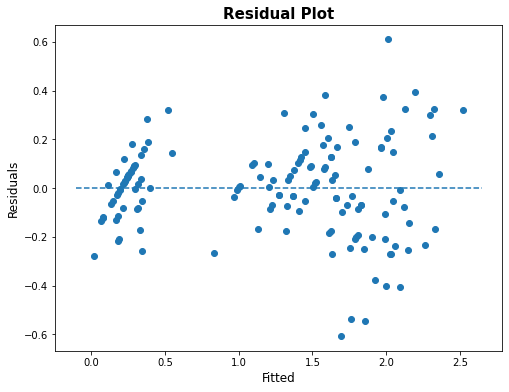

In [4]:
import matplotlib.pyplot as plt
lowess = sm.nonparametric.lowess

yhat = lm.predict(X1)
res = yhat-y

plt.figure(1, figsize=(8, 6))
plt.scatter(yhat, res)
plt.plot(plt.xlim(), [0,0], linestyle='dashed')
plt.xlabel('Fitted', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot',fontsize=15, fontweight="bold")
plt.show()

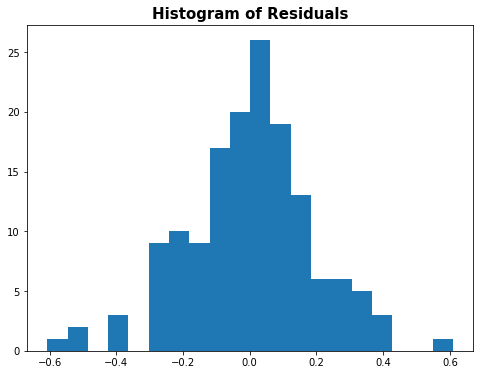

In [5]:
plt.figure(1, figsize=(8, 6))
plt.hist(res, bins=20)
plt.title('Histogram of Residuals',fontsize=15, fontweight="bold")
plt.show()

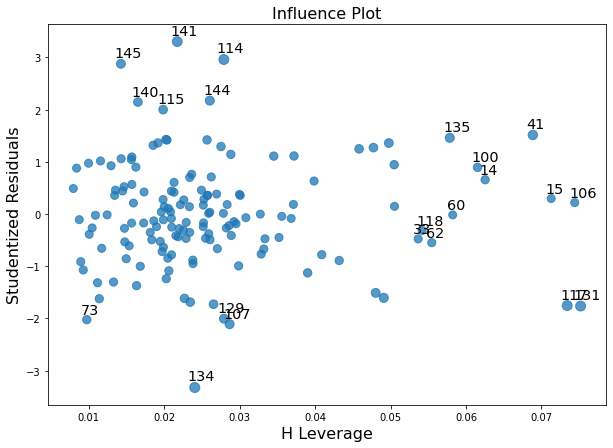

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
sm.graphics.influence_plot(lm, ax=ax, size=10)
plt.show()

## Detect Collinearity

In [7]:
np.corrcoef(X.T).round(2)

array([[ 1.  , -0.12,  0.87],
       [-0.12,  1.  , -0.43],
       [ 0.87, -0.43,  1.  ]])

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
np.round(VIF,2)

array([205.12,  85.42,  36.99])

# Logistic Regression

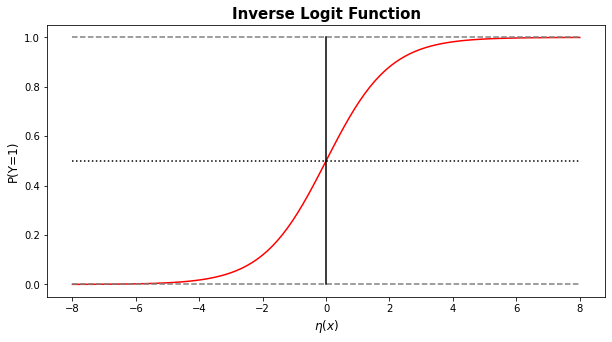

In [9]:
def ilogit(t):
    return 1/(1+np.exp(-t))

x = np.linspace(-8, 8, 100)

plt.figure(1, figsize=(10, 5))
plt.plot(x, ilogit(x), color='red')
plt.plot([-8,8], [1,1], linestyle="dashed", color='gray')
plt.plot([-8,8], [0,0], linestyle="dashed", color='gray')
plt.plot([-8,8], [0.5,0.5], linestyle="dotted", color='black')
plt.plot([0, 0], [0, 1], color='black')
plt.xlabel('$\eta(x)$', fontsize=12)
plt.ylabel('P(Y=1)', fontsize=12)
plt.title('Inverse Logit Function', fontsize=15, fontweight="bold")
plt.show()

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Change to your own Google drive path ... 
DataX = pd.read_csv("/content/drive/My Drive/Stat3612/mixture.csv", index_col = [0])
DataX.iloc[np.r_[0:5, -5:0]]

,x1,x2,y
1,2.526093,0.321050,0
2,0.366954,0.031462,0
3,0.768219,0.717486,0
4,0.693436,0.777194,0
5,-0.019837,0.867254,0
196,0.256750,2.293605,1
197,1.925173,0.165053,1
198,1.301941,0.992200,1
199,0.008131,2.242264,1
200,-0.196246,0.551404,1


In [12]:
from sklearn.linear_model import LogisticRegression

X = DataX.iloc[:,0:2]
y = DataX.iloc[:,2]
logreg = LogisticRegression()
logreg.fit(X, y)
np.round(logreg.intercept_, 4), np.round(logreg.coef_, 4)

(array([-0.9177]), array([[-0.141 ,  1.3297]]))

In [13]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
logreg = sm.Logit(y,X1).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.523853
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                  0.2442
Time:                        13:43:55   Log-Likelihood:                -104.77
converged:                       True   LL-Null:                       -138.63
Covariance Type:            nonrobust   LLR p-value:                 1.974e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9780      0.295     -3.321      0.001      -1.555      -0.401
x1            -0.1344      0.

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e8)
logreg.fit(X, y)
np.round(logreg.intercept_, 4), np.round(logreg.coef_, 4)

(array([-0.978]), array([[-0.1344,  1.3981]]))

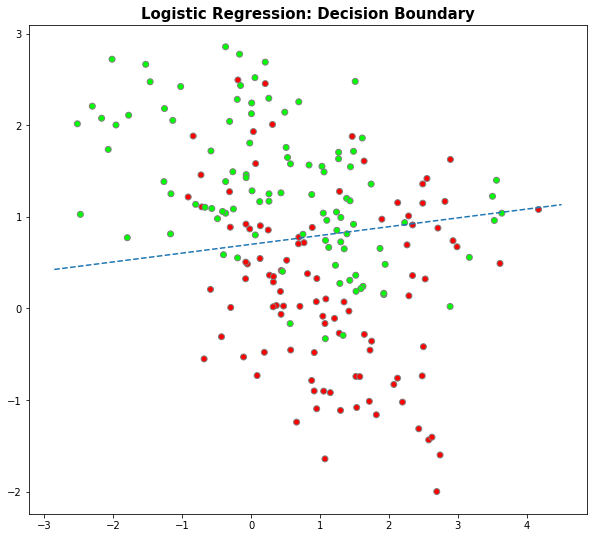

In [15]:
import matplotlib.colors as col

cmap_light = col.ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = col.ListedColormap(['#FF0000', '#00FF00'])

def abline(intercept,slope):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    
plt.figure(1, figsize=(10, 9))
plt.scatter(X.iloc[:, 0], X.iloc[:,1], c=y, edgecolors='gray', cmap=cmap_bold)
abline(-logreg.intercept_/logreg.coef_[0,1], -logreg.coef_[0,0]/logreg.coef_[0,1])
plt.title('Logistic Regression: Decision Boundary', fontsize=15, fontweight="bold")
plt.show()

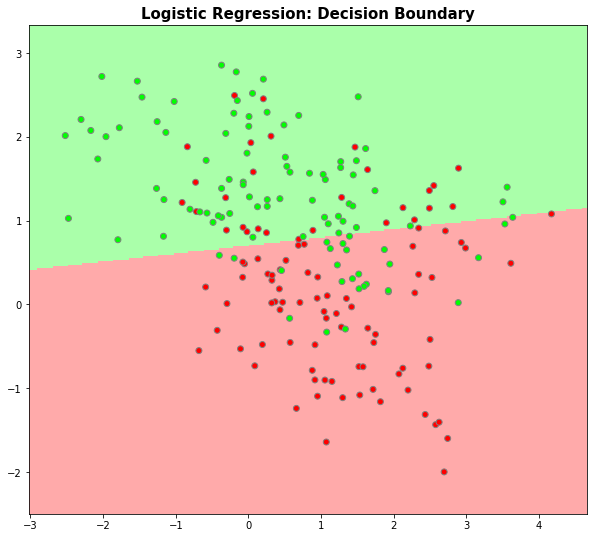

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].
x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(10, 9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X.iloc[:, 0], X.iloc[:,1], c=y, edgecolors='gray', cmap=cmap_bold)
plt.title("Logistic Regression: Decision Boundary", fontsize=15, fontweight="bold")
plt.show()

# Softmax Regression

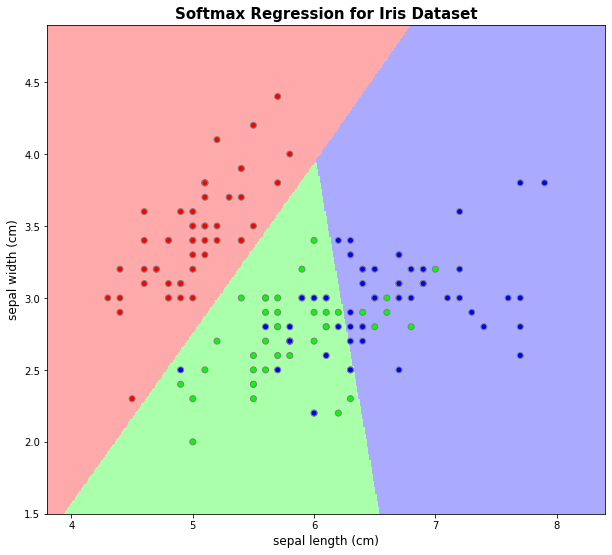

In [17]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris["data"][:, (0,1)]  # sepal length, sepal width
y = iris["target"]

softmaxreg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=1e10)
softmaxreg.fit(X, y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmaxreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = col.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = col.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(1, figsize=(10, 9))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:,1], c=y, edgecolors='gray', cmap=cmap_bold)
plt.xlabel(iris["feature_names"][0], fontsize=12)
plt.ylabel(iris["feature_names"][1], fontsize=12)
plt.title("Softmax Regression for Iris Dataset", fontsize=15, fontweight="bold")
plt.show()